# Data Structures and Processing

## Week3: NumPy, and Matplotlib

In [63]:
import numpy as np
from typing import Union

### Task 1 (0.5 pts): Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [ ]:
from google.colab import drive # type: ignore
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google.colab'

In [13]:
def heaviside(num: Union[int, float, np.ndarray]):
    return 1 if num > 0 else 0
    pass

In [14]:
assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1

In [62]:
assert np.all(heaviside(np.array([-1.2,0.2,3])) == np.array([0,1,1]))

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

### Task 2 (1 pts)

Extend the `heaviside` function to handle the `ndarray`.

In [19]:
# Your solution to extend the heaviside function to handle `ndarray` goes here.
def heaviside(num: Union[int, float, np.ndarray]):
  return np.where(num > 0,1,0)


In [20]:
assert np.all(heaviside(np.array([-1.2, 0.2, 3])) == np.array([0, 1, 1]))

### Task 3 (0.5 pts): Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [21]:
def mean_squared_values(arr: np.ndarray):
    return np.mean(arr ** 2)


In [22]:
x_utest = np.arange(10)
result = mean_squared_values(x_utest)

assert mean_squared_values(x_utest) == 28.5

### Task 4: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1 (0.5 pts): Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array. You can use either `np.loadtxt` or `pandas.read_csv` here.

In [46]:
import pandas as pd

def read_values(filename: str, index: int) -> np.ndarray:

    df = pd.read_csv(filename, sep=",", header=None, dtype=str)

    df[index] = pd.to_numeric(df[index], errors='coerce')

    return df[index].dropna().to_numpy()

In [47]:
import os
print(os.listdir())
read_values("data (1).txt",0)

['.config', 'drive', 'data (1).txt', 'sample_data']


array([-1.9142, -1.8918, -1.3978, -1.382 , -1.2789, -0.9405, -0.9159,
       -0.9139, -0.668 , -0.5575, -0.4231, -0.4084, -0.4001, -0.2533,
       -0.0993,  0.2214,  0.2642,  0.4028,  0.4189,  0.596 ,  0.6265,
        0.8675,  0.8837,  0.9667,  1.04  ,  1.0471,  1.115 ,  1.7697,
        1.814 ])

In [48]:
first_five = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])

assert np.allclose(read_values("data (1).txt", 0)[:5], first_five)

Use your function to read in values to two variables `x_values` and `y_values`.

In [51]:
x_values = read_values("data (1).txt",0)
y_values = read_values("data (1).txt",1)
print("First 5 values of x:", x_values[:5])
print("Frist 5 values of y:", y_values[:5])

First 5 values of x: [-1.9142 -1.8918 -1.3978 -1.382  -1.2789]
Frist 5 values of y: [-0.7919 -0.0492 -1.5441 -0.087  -1.3767]


In [50]:
first_five_x = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(x_values[:5], first_five_x)
assert np.allclose(y_values[:5], first_five_y)

#### Step 2 (0.5 pts): Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [52]:
y_values = np.exp(y_values)

In [53]:
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_values[:5], np.exp(first_five_y))

#### Step 3 (1 pts): Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

In [54]:
import matplotlib.pyplot as plt

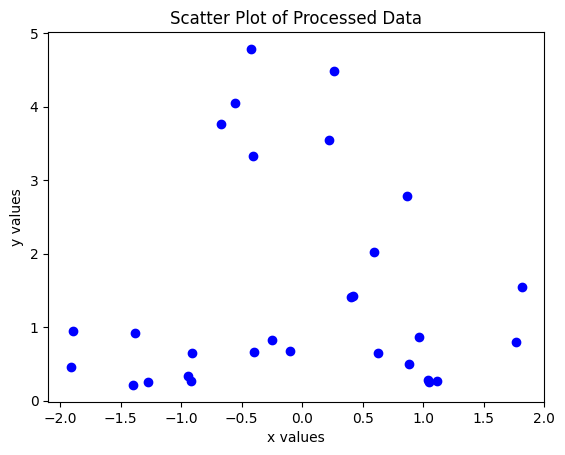

In [61]:
plt.plot(x_values, y_values, "bo")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Scatter Plot of Processed Data")

plt.show()

#### Step 4 (1 pts): Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`. You should use either `np.savetxt` of `DataFrame.to_csv` here.

In [65]:
# Your solution to
def data_to_csv(x_values: np.ndarray, y_values: np.ndarray, filename: str):
    df = pd.DataFrame({"X Values": x_values, "Y Values": y_values})
    df.to_csv(filename, index=False)


In [66]:
data_to_csv(x_values, y_values, 'new_filename.txt')

### **Additional Task: Real-World Weather Data Analysis**

#### **Congratulations!**  
You have successfully completed all the previous tasks. Now, are you ready to apply your skills to a more complex, real-world scenario?  

#### **Scenario:**  
As you might already know, the weather in Bremen is highly unpredictable. As a **data analyst** for a weather company, your task is to take **temperature data** collected from various sensors and analyze it to detect **extreme weather conditions** and identify **trends**. Try to use the functions you have already defined in the tasks above.

#### **Your tasks include:**  

1. **Calculating Temperature Statistics: (2 pts)**
   - Use NumPy functions (`np.mean`, `np.std`, `np.max`, and `np.min`) to compute key statistics about the temperature readings.  
   - Print these aggregate statistics before proceeding to visualization.  

2. **Visualizing Temperature Trends: (2 pts)**
   - Use `matplotlib` to create a **line plot** showing temperature trends over time.  
   - Add a **horizontal line** to represent the **mean temperature**, helping visualize fluctuations above and below the average.  

3. **Saving Results: (1 pts)**
   - Store the processed temperature data and computed statistics in a new CSV file for further analysis.  

By completing this task, you will gain experience in **data aggregation, visualization, and exporting results**, essential skills for real-world data analysis!


In [67]:
# We can use this snippet of code to simulate temperature data for 24 hours
import numpy as np
np.random.seed(42)
time = np.arange(24)  # Representing hours of the day
temperatures = np.random.normal(loc=10, scale=5, size=24)  # Normally distributed temperatures

print("First 5 temperatures", temperatures[:5])

First 5 temperatures [12.48357077  9.30867849 13.23844269 17.61514928  8.82923313]


In [68]:
mean_temp = np.mean(temperatures)
std_temp = np.std(temperatures)
max_temp = np.max(temperatures)
min_temp = np.min(temperatures)

print("Mean Temperature:", mean_temp)
print("Standard Deviation of Temperatures:", std_temp)
print("Maximum Temperature:", max_temp)
print("Minimum Temperature:", min_temp)

Mean Temperature: 9.261808595431855
Standard Deviation of Temperatures: 4.766281306058857
Maximum Temperature: 17.896064077536955
Minimum Temperature: 0.4335987767110101


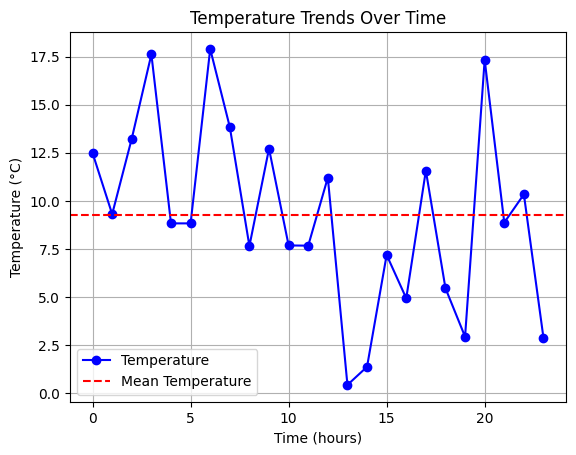

In [70]:
import matplotlib.pyplot as plt
plt.plot(time, temperatures, marker = "o", linestyle= "-", color="b", label = "Temperature")
plt.axhline(mean_temp, color= "r", linestyle = "--", label = "Mean Temperature")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.grid(True)


In [71]:
import pandas as pd

df = pd.DataFrame({"Hour": time, "Temperature": temperatures})

df.to_csv("temperature_data.csv", index = False)
